# More Multivariate Normal Things


## What is not Multivariate Regression

---

Rather than $\mathbf{y}_{n\times 1} \sim \mathcal{MVN}(\mathbf{X}_{n\times p}\boldsymbol{\beta}_{p\times 1}, \Sigma_{n\times n} = \sigma^2I_{n\times n})$

- where we used a multivariate $\mathcal{MVN}(\underset{p \times 1}{\boldsymbol\beta_0}, \underset{p \times p}{\Sigma_\beta})$ prior fo  $\boldsymbol \beta_{p\times 1}$
- and a univariate prior for precision $\phi = \sigma^{-2}$ or variance $\sigma^2$ such as $\text{gamma}(a,b)$ or $\mathcal{IG}(a,b)$

what about $\underset{m\times 1}{\mathbf{y}_i} \overset{iid}{\sim} \mathcal{MVN}(\boldsymbol{\beta}_{m\times p}^\top \underset{p\times 1}{\mathbf{x}_i},  \Sigma_{m\times m} \neq \sigma^2I_{n\times n})$ which models

- $\underset{n\times m}{\mathbf{y}}$ with
    - $E[\underset{n\times p}{\mathbf{y}}| \underset{n\times m}{\mathbf{X}} ] = \underset{n\times p}{\mathbf{X}}\boldsymbol{\beta}_{p\times m}$
    - $COV[\underset{\text{both } m\times 1}{\mathbf{y}_i, \mathbf{y}_j}] = \Sigma_{m\times m} $


The **likelihood** is
   
$\begin{align*}
f(\underset{n\times m}{\mathbf{y}}|\underset{n\times p}{\mathbf{X}}, \boldsymbol{\beta}_{p\times m}, \Sigma_{m\times m})
& ={} \prod_{i=1}^n (2\pi )^{-m/2}\det(\Sigma_{m\times m})^{-1/2}\,\exp \left(-{\frac {1}{2}}(\underset{m\times 1}{\mathbf{y}_i} - \boldsymbol{\beta}_{m\times p}^\top \underset{p\times 1}{\mathbf{x}_i} )^\top \Sigma_{m\times m}^{-1}(\underset{m\times 1}{\mathbf{y}_i} - \boldsymbol{\beta}_{m\times p}^\top \underset{p\times 1}{\mathbf{x}_i} )\right)\\
& \propto{} \det({ {\Sigma }})^{-n/2}\,\exp \left(\sum_{i=1}^n -{\frac {1}{2}}(\underset{m\times 1}{\mathbf{y}_i} - \boldsymbol{\beta}_{m\times p}^\top \underset{p\times 1}{\mathbf{x}_i} )^\top\Sigma_{m\times m}^{-1}(\underset{m\times 1}{\mathbf{y}_i} - \boldsymbol{\beta}_{m\times p}^\top \underset{p\times 1}{\mathbf{x}_i} )\right)\\
& \quad\; \text{The trace of a square matrix is the sum of its diagonal elements}\\
& = \det({ {\Sigma }})^{-n/2}\,\exp \left(-\frac{1}{2} \text{trace}\big((\underset{n\times m}{\mathbf{y}} - \underset{n\times p}{\mathbf{X}}\boldsymbol{\beta}_{p\times m}) \Sigma_{m\times m}^{-1} (\underset{n\times m}{\mathbf{y}} - \underset{n\times p}{\mathbf{X}}\boldsymbol{\beta}_{p\times m})^\top\big)\right)\\
& = \det({ {\Sigma }})^{-n/2}\,\exp \overset{\Large \text{trace}(ABC) \; = \;  \text{trace}(CAB)}{\left( -\frac{1}{2} \text{trace}\big((\underset{n\times m}{\mathbf{y}} - \underset{n\times p}{\mathbf{X}}\boldsymbol{\beta}_{p\times m})^\top(\underset{n\times m}{\mathbf{y}} - \underset{n\times p}{\mathbf{X}}\boldsymbol{\beta}_{p\times m}) \Sigma_{m\times m}^{-1} \big)\right)}\\
& = \det({\Sigma})^{-n/2}\,\exp \left( -\frac{1}{2} \text{trace}\big(\underset{\text{both } m\times m}{\boldsymbol \epsilon^\top \boldsymbol \epsilon} \underset{m\times m}{\Sigma^{-1}}\big)\right)\\
& = \det({\Sigma})^{-n/2}\,\exp \left( -\frac{1}{2} \text{trace}\big( \tilde{\underset{m\times m}{\boldsymbol \Psi}} \underset{m\times m}{\Sigma^{-1}}\big) \right)\\
& \propto {}
\mathcal{W}^{-1}\left({\mathbf\Psi} = \tilde{\underset{m\times m}{\boldsymbol \Psi}}, \nu = n-m-1 \right)
\end{align*}$

an [Inverse-Wishart](https://en.wikipedia.org/wiki/Inverse-Wishart_distribution) distribution when viewed as a function of $\Sigma$.


## Inverse-Wishart Distributions

---

Thus for an **inverse Wishart** $\mathcal{W}^{-1}\left({\mathbf\Psi} = \underset{m\times m}{\boldsymbol \Psi_0}, \nu = n_0 \right)$
 prior for covariance $\Sigma_{m\times m}$ the **full conditional**

$\begin{align*}
f(\Sigma_{m\times m} | \underset{n\times m}{\mathbf{y}},\underset{n\times p}{\mathbf{X}}, \boldsymbol{\beta}_{p\times m}) &\propto{}
f(\underset{n\times m}{\mathbf{y}}|\underset{n\times p}{\mathbf{X}}, \boldsymbol{\beta}_{p\times m}, \Sigma_{m\times m}) \times p(\Sigma)\\
&\propto{}
\det({\Sigma})^{-n/2}\,\exp \left( -\frac{1}{2} \text{trace}\big( \tilde{\underset{m\times m}{\boldsymbol \Psi}} \underset{m\times m}{\Sigma^{-1}}\big) \right) \times
\det({\Sigma})^{-(n_0+m+1)/2}\,\exp \left( -\frac{1}{2} \text{trace}\big( {\underset{m\times m}{\boldsymbol \Psi_0}} \underset{m\times m}{\Sigma^{-1}}\big) \right)\\
&\propto{}
\det({\Sigma})^{-(n+n_0+m+1)/2}\,\exp \left( -\frac{1}{2} \text{trace}\big( \tilde{\underset{m\times m}{\boldsymbol \Psi}} \underset{m\times m}{\Sigma^{-1}}\big) -\frac{1}{2} \text{trace}\big( {\underset{m\times m}{\boldsymbol \Psi_0}} \underset{m\times m}{\Sigma^{-1}}\big) \right)\\
&\propto{}
\det({\Sigma})^{-(n+n_0+m+1)/2}\,\exp \left( -\frac{1}{2} \text{trace}\Big( \big( \tilde{\underset{m\times m}{\boldsymbol \Psi}} + {\underset{m\times m}{\boldsymbol \Psi_0}} \big) \underset{m\times m}{\Sigma^{-1}} \Big) \right)
\end{align*}$

is also seen to be an **inverse Wishart** $\mathcal{W}^{-1}\left({\mathbf\Psi} = \tilde{\underset{m\times m}{\boldsymbol \Psi}} + \underset{m\times m}{\boldsymbol \Psi_0}, \nu = n+n_0 \right)$

---

## Conditional MVN distributions (are MVN distributions)

For **MVN** $f( \mathbf{\tilde x} = (\mathbf x,\mathbf x^*) )$

$$p\left(\mathbf{\tilde x}\;\Bigg|\;\boldsymbol \mu = \left[\begin{array}{c} \underset{q\times1}{\boldsymbol \mu_{\mathbf{ x}}}\\ \underset{r\times1}{\boldsymbol \mu_{\mathbf{ x^*}}} \end{array} \right], \boldsymbol \Sigma = \left[\begin{array}{cc}  \underset{q\times q}{{\boldsymbol {\Sigma }}_{\mathbf{x}}} &  \underset{q\times r}{{\boldsymbol {\Sigma }}_{\mathbf{x},\mathbf{x^*}}}\\  \underset{r \times q}{{\boldsymbol {\Sigma }}_{\mathbf{x^*}\!\!,\,\mathbf{x}} =  {\boldsymbol {\Sigma }}_{\mathbf{x},\mathbf{x^*}}^T} &  \underset{r\times r}{{\boldsymbol {\Sigma }}_{\mathbf{x*}}}\end{array}\right] \right) = {\frac {\exp \left(-{\frac {1}{2}}\left({\mathbf {\tilde x} }-{\boldsymbol {\mu }}\right)^{\mathrm {T} }{\boldsymbol {\Sigma }}^{-1}\left({\mathbf {\tilde x} }-{\boldsymbol {\mu }}\right)\right)}{\sqrt {(2\pi )^{q+r}|{\boldsymbol {\Sigma }}|}}}$$

the **conditional distribution** $f(\mathbf x^* | \mathbf x)$ of [is also **MVN**](https://en.wikipedia.org/wiki/Multivariate_normal_distribution#Conditional_distributions)

$$\mathbf{x^*} | \mathbf x, \boldsymbol \mu, \boldsymbol \Sigma \sim  \mathcal{MVN}\left( {\bar {\boldsymbol {\mu }}}= \underset{q\times1}{{\boldsymbol {\mu }}_{\mathbf{x^*}}}+ \underset{q\times r}{{\boldsymbol {\Sigma }}_{\mathbf{x^*}\!\!,\,\mathbf{x}}}  \underset{r\times r}{{\boldsymbol {\Sigma}}^{-1}_{\mathbf{x}}} \underset{r\times1}{\left(\mathbf {x} -{\boldsymbol {\mu }}_{\mathbf{x}}\right)},  {\overline {\boldsymbol {\Sigma }}}= \underset{q\times q}{{\boldsymbol {\Sigma }}_{\mathbf{x^*}}}- \underset{q\times r}{{\boldsymbol {\Sigma }}_{\mathbf{x^*}\!\!,\,\mathbf{x}}}  \underset{r\times r}{{\boldsymbol {\Sigma }}_{\mathbf{x}}^{-1}} \underset{r\times q}{{\boldsymbol {\Sigma }}_{\mathbf{x},\mathbf{x^*}}}  \right)$$

though if ${\boldsymbol {\Sigma }}_{\mathbf{x^*}\!\!,\,\mathbf{x}} = \mathbf{0}_{m \times n}$ then $\mathbf{x^*}$ is independent of $\mathbf{x}$



## What is Multivariate Regression?

For

- $y_{ik}$ the $k^{th}$ element of observation vector $\textbf{y}_{i}$
- $\textbf{y}_{i,-k}$ the vector of all other elements
- $\Sigma_{k,-k}$ the $k^{th}$ row without $\sigma_k^2 = \Sigma_{kk}$ and $\Sigma_{-k,k}$ the same for columns
- $\Sigma_{-k,-k}$ the $\Sigma$ matrix without the $k^{th}$ row and column
- $\boldsymbol \beta_k$ the vector corresponding to the $k^{th}$ row if $\boldsymbol \beta$
- $\boldsymbol \beta_{-k}$ the $\boldsymbol \beta$ without the $k^{th}$ row

$\begin{align*}
p(y_{ik}|\textbf{y}_{i,-k}, \text{etc.}) &={} \mathcal{N} (y_{ik}|\textbf{x}_i^\top \boldsymbol \beta_k + \Sigma_{k,-k}\Sigma_{-k,-k}^{-1} \left( \textbf{y}_{i,-k} - \boldsymbol \beta_{-k} \textbf{x}_i \right), \sigma^2_k - \Sigma_{k,-k}\Sigma_{-k,-k}^{-1}\Sigma_{-k,k})) \\
&={} \mathcal{N} (y_{ik}|\textbf{x}_i^\top \boldsymbol \beta_k + \left( \textbf{y}_{i,-k} - \boldsymbol \beta_{-k} \textbf{x}_i \right)^\top \Sigma_{-k,-k}^{-1}\Sigma_{-k,k}, \sigma^2_k - \Sigma_{k,-k}\Sigma_{-k,-k}^{-1}\Sigma_{-k,k})
\end{align*}$

Thus for $\underset{n\times 1}{\mathbf{y}_k}$ the $k^{th}$ column of $\underset{n\times m)}{\mathbf{y}}$ and $\underset{n\times (m-1)}{\mathbf{y}_{-k}}$ the matrix $\underset{n\times m}{\mathbf{y}}$ without its $k^{th}$ column

$\begin{align*}
\prod_{i=1}^n p(y_{ik}|\textbf{y}_{i,-k}, \text{etc.}) &\propto{} \exp\left(-\frac{\big(\underset{n\times 1}{\mathbf{y}_k} - (\underset{n\times (m-1)}{\mathbf{y}_{-k} - \textbf{X} \boldsymbol \beta_{-k}} )\underset{n\times 1}{\Sigma_{-k,-k}^{-1}\Sigma_{-k,k}} - \underset{n\times 1}{\textbf{X} \boldsymbol \beta_k} \big)^{\top}\big(\underset{n\times 1}{\mathbf{y}_k} - (\underset{n\times (m-1)}{\mathbf{y}_{-k} - \textbf{X} \boldsymbol \beta_{-k}} )\underset{n\times 1}{\Sigma_{-k,-k}^{-1}\Sigma_{-k,k}} - \underset{n\times 1}{\textbf{X} \boldsymbol \beta_k} \big)}{2(\sigma^2_k - \Sigma_{k,-k}\Sigma_{-k,-k}^{-1}\Sigma_{-k,k})} \right)
\end{align*}$

which is a **linear regression model** with an adjustment for the **residuals** of the other $k-1$ regression models based on the covariance structure of the outcomes $\Sigma$




While the outcomes are a little more complex than usual, when viewed as a function of the $k^{th}$ column $\underset{p\times 1}{\boldsymbol{\beta}_k}$ of $\boldsymbol{\beta}_{p\times m}$ this is just a **standard linear regression model**

Which suggests a multivariate $\mathcal{MVN}(\underset{p \times 1}{\boldsymbol\beta_0}, \underset{p \times p}{\Sigma_\beta})$ prior for each $\underset{p\times 1}{\boldsymbol{\beta}_k}$

$\begin{align*}
f(\boldsymbol{\beta}_{k} | \underset{n\times m}{\mathbf{y}}, \underset{n\times p}{\mathbf{X}}, \underset{n\times (m-1)}{\boldsymbol \beta_{-k}}, \Sigma_{m\times m})
& \propto{} \prod_{i=1}^n p(y_{ik}|\textbf{y}_{i,-k}, \text{etc.}) \times p(\boldsymbol{\beta}_{k}) \\
& \propto{} \exp \left( -\frac{1}{2} (\underset{n\times 1}{\mathbf{\tilde y}_k} - \underset{n\times p}{\mathbf{X}}\underset{p\times 1}{\boldsymbol{\beta}_k})^\top \tilde \sigma_{k}^{-2}(\underset{n\times 1}{\mathbf{\tilde  y}_k} - \underset{n\times p}{\mathbf{X}}\underset{p\times 1}{\boldsymbol{\beta}_k})\right) \times \exp \left(-{\frac {1}{2}}(\boldsymbol\beta - \boldsymbol\beta_0)^\top \Sigma_\beta^{-1}(\boldsymbol\beta - \boldsymbol\beta_0)\right) \\
& \propto{} \mathcal{MVN}\left( COV \times \big(\Sigma_\beta^{-1} \beta_0 + \sigma_{k}^{-2}\mathbf{X}^\top \mathbf{\tilde y}_k\big), COV = \big(\Sigma_\beta^{-1} + \tilde \sigma_{k}^{-2}\mathbf{X}^\top\mathbf{X}\big)^{-1}  \right)
\end{align*}$




## More on Inverse-Wishart Distributions


In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


In [ ]:
p = 2  # dimension
# scale matrix
Psi = np.eye(dimension)  # 2x2 identity
try:
    nu = 101 # nu must be greater than p-1
    # nu is the "degrees of freedom"
    print(stats.invwishart(df=nu, scale=Psi).rvs())

except ValueError as error:
    print(error)

print("|Sigma|^{nu+p+1} with nu =", nu," > p-1 =",p-1,"?")

[[ 0.01074686 -0.00134177]
 [-0.00134177  0.00861041]]
|Sigma|^{nu+p+1} with nu = 101  > p-1 = 1 ?



$$E[\boldsymbol \Sigma] = \frac{\boldsymbol\Psi}{\nu - p - 1} \text{ for } \boldsymbol \Sigma \sim \mathcal{W}^{-1}(\boldsymbol \Psi,\nu) \text{ is defined for } \nu>p+1$$


In [ ]:
                       # df=p-1 obviously won't work...
denom = 1              # df=p+1 won't work...
myIWD = stats.invwishart(df=p+1+denom, scale=Psi*[1,denom][denom>0])
myIWD.rvs(size=10000).mean(axis=0)

array([[ 1.07176305, -0.03084237],
       [-0.03084237,  1.03532354]])

## The LKJ (not Inverse-Wishart) prior

The **covariance matrix** $ \Sigma_{p \times p} = {D R D} = {D LL^\top D}$ for
- ${D} = \operatorname{diag}(\boldsymbol \sigma)$ the diagonal matrix of **standard deviations**
- ${R}$ the **correlation matrix** with all diagonal values equal to $1$
- ${L}$ the lower diagonal of the **Cholesky decomposition** of ${R}$

The **LKJ (Lewandowski-Kurowicka-Joe) prior** is [simpler to evaluate](https://mc-stan.org/docs/functions-reference/cholesky-lkj-correlation-distribution.html)  than the **Inverse-Wishart**

$$\require{cancel}
\begin{align*}
p( {R}) &\propto {}\det({R})^{\eta -1}\\
f^{-1}( {L}) &={} {L} {L}^\top = R\\
p( {L}) &\propto{} \det({LL^\top})^{\eta -1} \det(J) = \underbrace{\left(\prod_{k=1}^p  {L}_{kk}\right)^{\eta -1}}_{\det({L})^{\eta -1}}\underbrace{\left(\prod_{k=1}^p  {L}_{kk}^\top\right)^{\eta -1}}_{\det({L^\top})^{\eta -1}} \underbrace{\left(\prod_{k=1}^p 2 {L}_{kk}^{p+1-k}\right)}_{\det(J)} = 2 \prod_{k=1}^p  {L}_{kk}^{p+1-k + 2(\eta-1)}\\
J &={} \frac{d f^{-1}( {L})}{d  {L}} \quad J_{ij} = \frac{d {r}_i}{d {l}_j}\\
\end{align*}$$

since (1) the determinant of a product is the product of the determinants, (2) the determinant of a triangular matrix is the product of the diagonals, and (3) the Jacobian matrix $J$ is also triangular as given below.



$\begin{align*}
LL^T &={}
\begin{array}{|c|c|c|}
\hline
l_1 = L_{11} & & \\\hline
l_2 = L_{21} & l_4 = L_{22} &\\\hline
l_3 = L_{31} & l_5 = L_{32} & l_6 = L_{33} \\\hline
\end{array} \times
\begin{array}{|c|c|c|}
\hline
L_{11} & L_{21} & L_{31} \\\hline
 & L_{22} &  L_{32} \\\hline
 & & L_{33} \\\hline
\end{array}\\
&={}
\begin{array}{|l|l|l|}
\hline
r_1 = R_{11} = L_{11}^2 & r_2 & r_3 \\\hline
r_2 = R_{12} = L_{21}L_{11} & r_4 = R_{22} = L_{12}^2 + L_{22}^2 & r_5\\\hline
r_3 = R_{13} = L_{31}L_{11} & r_5 = R_{32} = L_{31}L_{21} + L_{32}L_{22} & r_6 = L_{31}^2 + L_{32}^2 + L_{33}^2 \\\hline
\end{array}\\
J &={}
\begin{array}{|l|l|l|l|l|l|}
\hline
\frac{dr_1}{dl_1}=2L_{11}&\frac{dr_1}{dl_2}=0&\frac{dr_1}{dl_3}=0&\frac{dr_1}{dl_4}=0&\frac{dr_1}{dl_5}=0&\frac{dr_1}{dl_6}=0\\\hline
\frac{dr_2}{dl_1}&\frac{dr_2}{dl_2} = L_{11} &\frac{dr_2}{dl_3}=0&\frac{dr_2}{dl_4}=0&\frac{dr_2}{dl_5}=0&\frac{dr_2}{dl_6}=0\\\hline
\frac{dr_3}{dl_1}&\frac{dr_3}{dl_2}&\frac{dr_3}{dl_3} = L_{11} &\frac{dr_3}{dl_4}=0&\frac{dr_3}{dl_5}=0&\frac{dr_3}{dl_6}=0\\\hline
\frac{dr_4}{dl_1}&\frac{dr_4}{dl_2}&\frac{dr_4}{dl_3}&\frac{dr_4}{dl_4}=2L_{22}&\frac{dr_4}{dl_5}=0&\frac{dr_4}{dl_6}=0\\\hline
\frac{dr_5}{dl_1}&\frac{dr_5}{dl_2}&\frac{dr_5}{dl_3}&\frac{dr_5}{dl_4}&\frac{dr_5}{dl_5}=L_{22}&\frac{dr_5}{dl_6}=0\\\hline
\frac{dr_6}{dl_1}&\frac{dr_6}{dl_2}&\frac{dr_6}{dl_3}&\frac{dr_6}{dl_4}&\frac{dr_6}{dl_5}&\frac{dr_6}{dl_6}=2L_{33}\\\hline
\end{array}
\end{align*}
$

### More details

$p(\mathbf {R}) \propto \det(\mathbf{R}_{p \times p})^{\eta -1}$ with $\eta=1$ is $p(\mathbf {R}) \propto 1$ which specifies a uniform distribution on **correlation matrices**. This is nonetheless a **proper prior** and so results in a **proper posterior** when used with the **multivariate regression** specification above.

> $p(\boldsymbol \Sigma)\propto 1$ is an **improper prior** and so results in an **improper posterior** when used with the **multivariate regression** specification above until $n$ results in a sufficiently large $\nu$.
>
> - Intuitively, the difference here is that each element of $\Sigma$ is unbounded while each element of $R$ is bounded.

The absolute **determinant** is the product of the **singular values**
- The **determinant** is positive for **positive definite matrices** such as $R$
- For **correlation matrices** the **determinant** is largest when all **singular values** (which sum to $p$) are equal to $1$ which happens when all off-diagonal correlations are $0$

Increasing $\eta \rightarrow \infty$ thus favors **correlation matrices** with
smaller magnitudes of component correlations.

Univariate priors for $\sigma_k = \boldsymbol \sigma_k$ are needed to complete the full specification $p(\boldsymbol \Sigma) \propto p(\boldsymbol \sigma)p(\mathbf {R})$.

> This is the first time we leverage the proportionality starting immediately with the prior (before even considering the posterior).








In [ ]:
import pymc as pm

with pm.Model() as LKJ:
    packed_L = pm.LKJCholeskyCov("packed_L", n=2, eta=2.0,
                                 sd_dist=pm.Exponential.dist(1.0, shape=2),
                                 compute_corr=False)
packed_L.eval()

array([ 1.31223496, -0.08561639,  2.02967541])

In [ ]:
with LKJ:
    L = pm.expand_packed_triangular(2, packed_L)
    Sigma = L.dot(L.T)
Sigma.eval()#.shape

array([[ 1.72196058, -0.11234882],
       [-0.11234882,  4.12691244]])

In [ ]:
L.eval()

array([[ 1.31223496,  0.        ],
       [-0.08561639,  2.02967541]])

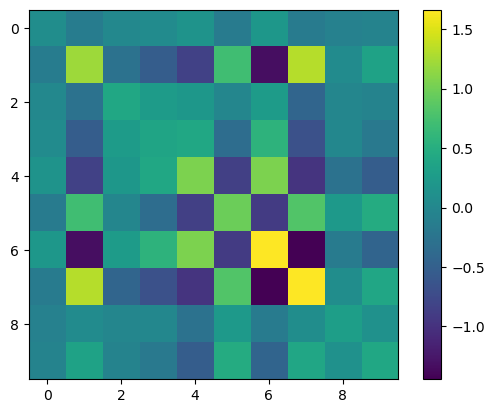

In [ ]:
p=10
Psi=np.eye(p)
a_cov = stats.invwishart(df=p+2, scale=Psi).rvs()
n=100
x=stats.multivariate_normal(mean=np.zeros(p), cov=a_cov).rvs(size=n)
plt.imshow(a_cov)
plt.colorbar();

In [ ]:
with pm.Model() as MNV_LKJ:

    packed_L = pm.LKJCholeskyCov("packed_L", n=p, eta=2.0,
                                 sd_dist=pm.Exponential.dist(1.0, shape=2),
                                 compute_corr=False)
    L = pm.expand_packed_triangular(p, packed_L)
    Sigma = pm.Deterministic('Sigma', L.dot(L.T))
    mu = pm.MvNormal('mu', mu=0, cov=np.eye(p), shape=p)
    y = pm.MvNormal('y', mu=mu, chol=L,  #cov=Sigma
                    shape=(n,1), observed=x)

    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [packed_L, mu]


/Users/scottschwartz/miniconda3/envs/PyMC/lib/python3.11/site-packages/pytensor/compile/function/types.py:970: RuntimeWarning: invalid value encountered in accumulate
  self.vm()
/Users/scottschwartz/miniconda3/envs/PyMC/lib/python3.11/site-packages/pytensor/compile/function/types.py:970: RuntimeWarning: invalid value encountered in accumulate
  self.vm()
/Users/scottschwartz/miniconda3/envs/PyMC/lib/python3.11/site-packages/pytensor/compile/function/types.py:970: RuntimeWarning: invalid value encountered in accumulate
  self.vm()
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 23 seconds.


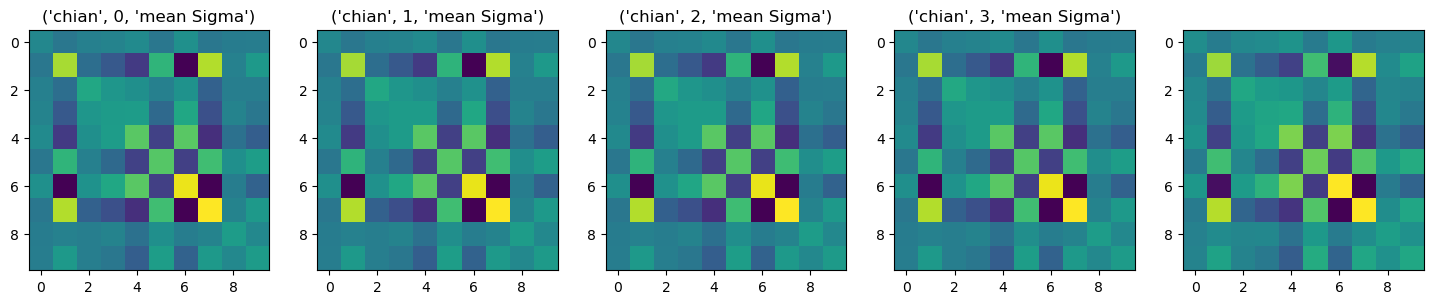

In [ ]:
fig,ax = plt.subplots(1,5,figsize=(18,4))
ax[-1].imshow(a_cov)
ax[0].set_title(("Sigma used to generate y"))
for chain in range(4):
    ax[chain].imshow(idata.posterior['Sigma'].mean(axis=1)[chain])
    ax[chain].set_title(("chian",chain,"mean Sigma"))

## MVN computation

Using the **Cholesky decomposition** is desirable because it provides efficient computation **MVN** evaluations $(2\pi )^{-k/2}\det({\boldsymbol {\Sigma }})^{-1/2}\,\exp \left(-{\frac {1}{2}}( {y} -{X\beta})^\top{\boldsymbol {\Sigma }}^{-1}({y} - {X\beta})\right)$ since

- $\det({\boldsymbol {\Sigma }}) = \det({LL^T}) = \det({L}) \det({L^T}) = \prod_{k=1}^p  {L}_{kk}^2$

as already seen above, but now also

- $(\textbf{y}-\boldsymbol\mu)^\top\boldsymbol\Sigma^{-1}(\textbf{y}-\boldsymbol\mu) = \boldsymbol \epsilon^\top  {L}^{-\top} {L}^{-1} \boldsymbol \epsilon = \underbrace{( {L}^{-1} \boldsymbol \epsilon)^\top( {L}^{-1} \boldsymbol \epsilon) =  \textbf{x}^\top \textbf{x}}_{\Large \Longrightarrow \; {L} \textbf{x}\; =\; \boldsymbol \epsilon} $

where $\textbf{x}$ can be efficiently solved for based on **lower triangular backwards substitution** and hence $\textbf{x}^\top \textbf{x}$ directly computed without requiring the inversion $\Sigma^{-1}$


## Week 10 Homework

---

### Q1: perform Bayesian Logistic Regression

- For a binary outcome dataset you find interesting (perhaps from kaggle.com?)
- Model the outcome as a bernoulli random variable and use a **logit link** function
- Use `pm.Normal('betas', mu=0, sigma=1, shape=p)` rather than the `pm.MvNormal` version
- Provide inference with Bayesian posterior analysis and report MCMC diagnostics

### Q2: perform Bayesian Multivariate Regression

- For a data set for which modeling multiple continuous outcomes might be interesting (perhaps from kaggle.com?)
- Use `pm.Normal('betas', mu=0, sigma=1, shape=(p,m))` rather than a `pm.MvNormal` alternative
- Use `y = pm.MvNormal('y', mu=X@betas, chol=L, observed=x)` for `(n,m)` shaped `y` and `(n,p)` shaped `X`
- Downsample your dataset to tentatively explore the effect of different values of `n`,`m`,`p` and
    - report on your findings and based on that
    - choose a "reasonably small" sized data set to perform an actual analysis
- Provide inference with Bayesian posterior analysis and report MCMC diagnostics



Output()

           mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
betas[0] -0.492  0.469  -1.325    0.436      0.006    0.005    6251.0   
betas[1]  0.835  0.738  -0.547    2.213      0.011    0.008    4660.0   
betas[2] -0.158  0.701  -1.469    1.162      0.010    0.008    5185.0   
betas[3] -1.666  0.705  -2.983   -0.346      0.009    0.007    5911.0   

          ess_tail  r_hat  
betas[0]    5623.0    1.0  
betas[1]    5662.0    1.0  
betas[2]    5602.0    1.0  
betas[3]    5447.0    1.0  


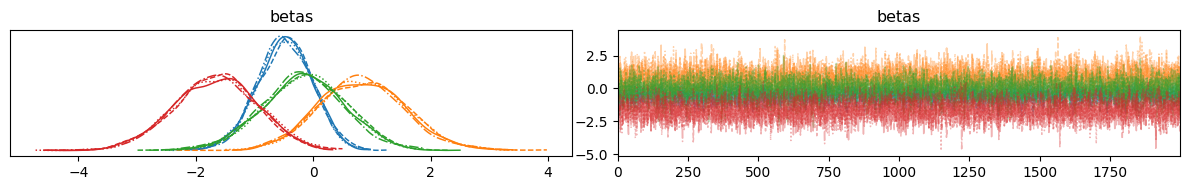


Diagnostics:
Number of divergences: 0
ESS (bulk/tail): [[6251. 5623.]
 [4660. 5662.]
 [5185. 5602.]
 [5911. 5447.]]


In [7]:
#Q1
import pandas as pd
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load mtcars dataset
mtcars = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/mtcars.csv')
mtcars = mtcars.rename(columns={'Unnamed: 0': 'car_name'})

# Extract outcome and predictors
y = mtcars['vs'].values
X = mtcars[['mpg', 'wt', 'hp']]

# Standardize predictors and add intercept
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=['mpg', 'wt', 'hp'])
X_scaled['intercept'] = 1  # Add intercept column
X_array = X_scaled[['intercept', 'mpg', 'wt', 'hp']].values

with pm.Model() as logistic_model:
    # Priors for coefficients (including intercept)
    betas = pm.Normal('betas', mu=0, sigma=1, shape=X_array.shape[1])

    # Linear predictor and logit link
    logit_p = pm.math.dot(X_array, betas)
    p = pm.math.sigmoid(logit_p)  # Logit link

    # Likelihood
    y_obs = pm.Bernoulli('y_obs', p=p, observed=y)

    # MCMC sampling (PyMC uses NUTS by default)
    trace = pm.sample(
        draws=2000,
        tune=2000,
        chains=4,
        target_accept=0.95
    )


# Summary statistics (includes R-hat and ESS)
summary = az.summary(trace, var_names=['betas'])
print(summary)

# Trace plots
az.plot_trace(trace, var_names=['betas'])
plt.tight_layout()
plt.show()

# Check divergences and diagnostics
print("\nDiagnostics:")
print(f"Number of divergences: {trace.sample_stats['diverging'].sum().item()}")
print(f"ESS (bulk/tail): {summary[['ess_bulk', 'ess_tail']].values}")

Downsampled dimensions: n=100, p=6, m=3


Output()


Posterior Summary:


/usr/local/lib/python3.11/dist-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


                   mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
betas[0, 0]       5.549  0.773   4.141    7.028      0.012    0.009    4143.0   
betas[0, 1]      -0.570  0.372  -1.226    0.167      0.006    0.004    4019.0   
betas[0, 2]       0.739  0.982  -1.012    2.633      0.012    0.014    6627.0   
betas[1, 0]       1.275  0.809  -0.262    2.737      0.013    0.010    3916.0   
betas[1, 1]      -4.771  0.537  -5.713   -3.724      0.012    0.008    2202.0   
betas[1, 2]       4.062  0.976   2.141    5.779      0.012    0.009    6215.0   
betas[2, 0]       1.919  0.679   0.629    3.144      0.010    0.008    4507.0   
betas[2, 1]       0.284  0.358  -0.389    0.944      0.006    0.005    3699.0   
betas[2, 2]       3.020  0.967   1.213    4.736      0.011    0.009    7149.0   
betas[3, 0]      -0.191  0.682  -1.379    1.148      0.010    0.010    5115.0   
betas[3, 1]       0.176  0.351  -0.483    0.821      0.005    0.005    4359.0   
betas[3, 2]       1.833  1.0

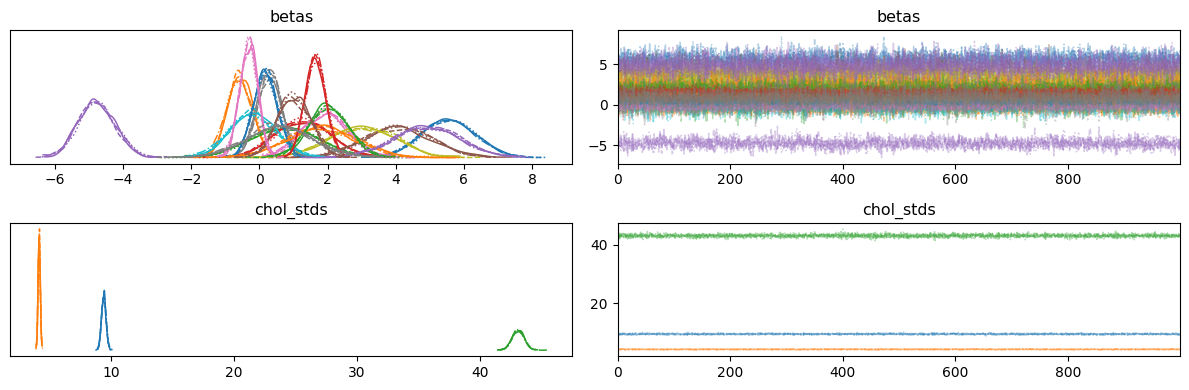

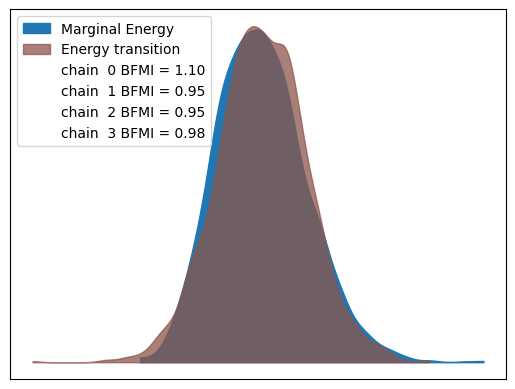

In [5]:
#Q2
import pandas as pd
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load and prepare penguins data
df = sns.load_dataset('penguins').dropna()

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Define features and targets
X_cat = ['species', 'island', 'sex']  # Categorical features
X_num = ['body_mass_g']                # Numerical feature
y_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']  # Multiple outcomes

# Preprocessing pipeline
encoder = OneHotEncoder(drop='first', sparse_output=False)
scaler = StandardScaler()

# Process features
X_encoded = encoder.fit_transform(df[X_cat])
X_scaled = scaler.fit_transform(df[X_num])
X_processed = np.hstack([X_encoded, X_scaled])

# Target matrix
y = df[y_cols].values

np.random.seed(42)
sample_idx = np.random.choice(len(y), 100, replace=False)
X_small = X_processed[sample_idx]
y_small = y[sample_idx]

n, p = X_small.shape
m = y_small.shape[1]

print(f"Downsampled dimensions: n={n}, p={p}, m={m}")

with pm.Model() as multivariate_model:
    # Regression coefficients (p predictors × m outcomes)
    betas = pm.Normal('betas', mu=0, sigma=1, shape=(p, m))

    # Covariance matrix components
    chol, corr, stds = pm.LKJCholeskyCov('chol', n=m, eta=2, sd_dist=pm.HalfNormal.dist(1))

    # Linear predictor
    mu = pm.math.dot(X_small, betas)

    # Multivariate likelihood
    y_obs = pm.MvNormal('y_obs', mu=mu, chol=chol, observed=y_small)

    # Sampling
    trace = pm.sample(1000, tune=1000, chains=4,
                     target_accept=0.95, random_seed=42,
                     return_inferencedata=True)

# Diagnostics and results
print("\nPosterior Summary:")
print(az.summary(trace, var_names=['betas', 'chol_stds', 'chol_corr']))

az.plot_trace(trace, var_names=['betas', 'chol_stds'])
plt.tight_layout()
plt.show()

az.plot_energy(trace)
plt.show()

              mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
betas[0, 0]  5.541  0.772   4.088    6.989      0.008    0.006    8922.0   
betas[0, 1] -0.568  0.376  -1.261    0.152      0.004    0.003    8033.0   
betas[0, 2]  0.748  0.985  -1.146    2.518      0.009    0.009   12988.0   
betas[1, 0]  1.266  0.814  -0.259    2.765      0.010    0.007    6981.0   
betas[1, 1] -4.769  0.533  -5.748   -3.755      0.008    0.006    4477.0   
betas[1, 2]  4.055  0.967   2.230    5.837      0.008    0.006   13786.0   
betas[2, 0]  1.919  0.677   0.643    3.146      0.007    0.005    9227.0   
betas[2, 1]  0.280  0.360  -0.397    0.945      0.004    0.003    7702.0   
betas[2, 2]  3.017  0.967   1.268    4.846      0.009    0.006   12908.0   
betas[3, 0] -0.193  0.678  -1.416    1.112      0.007    0.007   10621.0   
betas[3, 1]  0.175  0.345  -0.456    0.826      0.004    0.003    8037.0   
betas[3, 2]  1.825  0.984   0.024    3.686      0.009    0.007   11268.0   
betas[4, 0] 

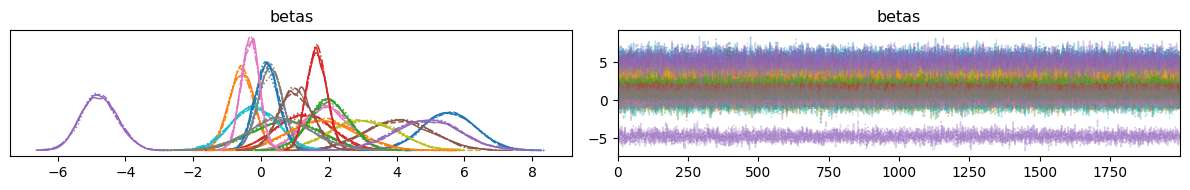


Diagnostics:
Number of divergences: 0
ESS (bulk/tail): [[ 8922.  6427.]
 [ 8033.  5983.]
 [12988.  5850.]
 [ 6981.  6206.]
 [ 4477.  5289.]
 [13786.  6344.]
 [ 9227.  6599.]
 [ 7702.  6181.]
 [12908.  5560.]
 [10621.  7069.]
 [ 8037.  6520.]
 [11268.  6584.]
 [ 8454.  5840.]
 [ 5818.  6874.]
 [11192.  5896.]
 [ 5821.  5936.]
 [ 5366.  5237.]
 [ 9709.  5607.]]


# Q2
Report on finding:
In exploring the effects of varying dimensions n,p,mon the Bayesian Multivariate Regression model, we observed that smaller sample sizes n led to wider credible intervals and less stable covariance estimates, particularly for rare categories and residual correlations. Increasing n to the full datasetn improved parameter precision, with tighter credible intervals and more reliable covariance estimates. The number of predictors(p) and outcomes(m) remained manageable, but larger p and m may result in overfitting. A reasonable size of n is satisfactory.

In [12]:
n,m,p = 100,10,5
beta_ = np.ones((p,m))
X = stats.norm().rvs((n,p))
a_cov = stats.invwishart(df=m+2, scale=np.eye(m)).rvs()
x = X@beta_ + stats.multivariate_normal(mean=np.zeros(m), cov=a_cov).rvs(size=n)

with pm.Model() as MNV_LKJ:

    packed_L = pm.LKJCholeskyCov("packed_L", n=m, eta=2.0,
                                 sd_dist=pm.Exponential.dist(1.0, shape=m),
                                 compute_corr=False)
    L = pm.expand_packed_triangular(m, packed_L)
    betas = pm.Normal('betas', mu=0, sigma=1, shape=(p,m))
    Sigma = pm.Deterministic('Sigma', L.dot(L.T))
    y = pm.MvNormal('y', mu=X@betas, chol=L,  #cov=Sigma
                    observed=x)

    idata = pm.sample()

Output()

/usr/local/lib/python3.11/dist-packages/pytensor/tensor/subtensor.py:2585: RuntimeWarning: invalid value 
encountered in add
  np.add.at(x, idx, y)

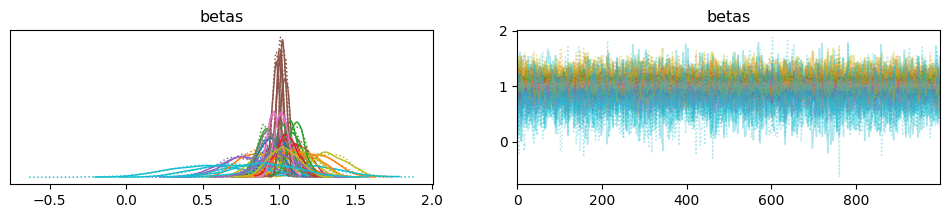

In [13]:
import arviz as az

az.plot_trace(idata,var_names='betas');

IndexError: index 2 is out of bounds for axis 0 with size 2

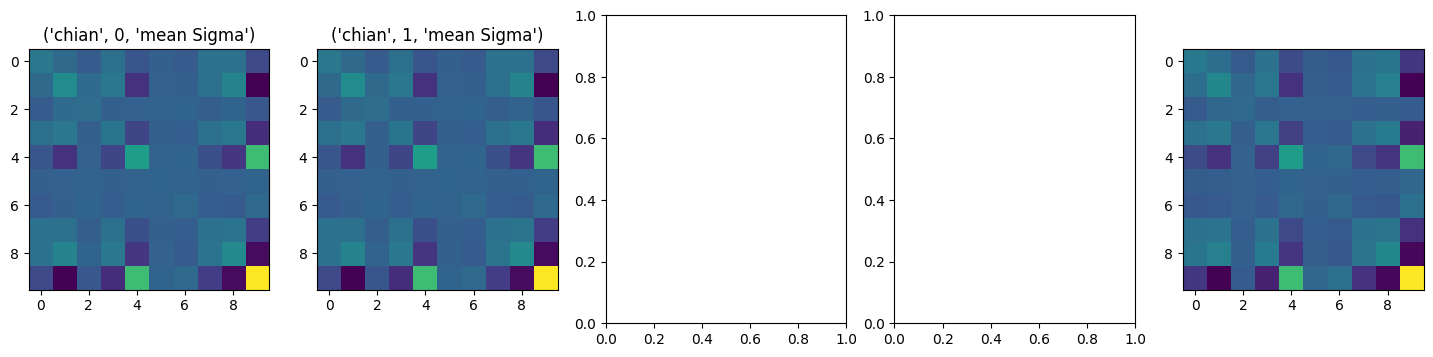

In [14]:
fig,ax = plt.subplots(1,5,figsize=(18,4))
ax[-1].imshow(a_cov)
ax[0].set_title(("Sigma used to generate y"))
for chain in range(4):
    ax[chain].imshow(idata.posterior['Sigma'].mean(axis=1)[chain])
    ax[chain].set_title(("chian",chain,"mean Sigma"))

### Probit Regression (as opposed to Logistic Regression)

- $\Phi$ is CDF of standard normal (and is also call the **inverse probit** function)
    - The **probit** function is $\Phi^{-1}$
- $z_i \sim N(x_i^\top\beta,1)$


$$\int \Phi(z_i)^{y_i} (1-\Phi(z_i))^{1-y_i}d\Phi(z) = \Phi(x_i^\top\beta)^{y_i} (1-\Phi(x_i^\top\beta))^{1-y_i} = p_i^{y_i} (1-p_i)^{1-y_i} $$

### Q3: perform Bayesian Multivariate Classification

- For a data set for which modeling multiple binary outcomes might be interesting (perhaps from kaggle.com?)
- Use `pm.Normal('betas', mu=0, sigma=1, shape=(p,m))` rather than a `pm.MvNormal` alternative
- Use `y = pm.Bernoulli('y', p=pm.math.invprobit(X@betas), observed=x)` for `(n,m)` shaped `y` and `(n,p)` shaped `X`
- Use latent `z = pm.MvNormal('z', mu=X@betas, chol=L)` as discussed in the "Generalized Linear Models (GLM)" section of the previous weeks lecture notes

> This provides normally distributed latent variables connected to the observed binary outcomes on which a latent covariance dependency structure may be modelled and estimated on the basis of imputing the unobserved latent variables based on their connection with the observed binary outcome variables.

- Downsample your dataset to tentatively explore the effect of different values of `n`,`m`,`p` and
    - report on your findings and based on that
    - choose a "reasonably small" sized data set to perform an actual analysis
- Provide inference with Bayesian posterior analysis and report MCMC diagnostics


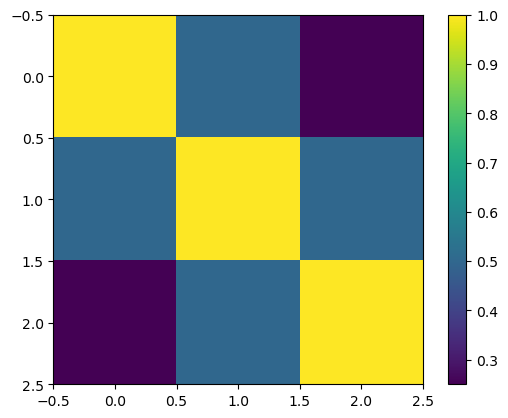

In [ ]:
n,m,p = 100,3,3
beta_ = np.ones((p,m))
X = stats.norm().rvs((n,p))
#a_cov = stats.invwishart(df=m+2, scale=np.ones(m)).rvs()
a_cor = (np.ones((p,p))+np.diag((1,1,1)))/2
a_cor[0,-1] = 0.25
a_cor[-1,0] = 0.25
x = X@beta_ + stats.multivariate_normal(mean=np.zeros(m), cov=a_cor).rvs(size=n)
plt.imshow(a_cor)
plt.colorbar()

# Make outcome binary
x = x>0

In [ ]:
with pm.Model() as GLM:

    L,R,std = pm.LKJCholeskyCov("R", n=m, eta=2.0,
                                sd_dist=pm.Exponential.dist(1.0, shape=m),
                                compute_corr=True)
    #L = pm.expand_packed_triangular(m, packed_L)
    betas = pm.Normal('betas', mu=0, sigma=1, shape=(p,m))
    #Sigma = pm.Deterministic('Sigma', L.dot(L.T))
    z = pm.MvNormal('z', mu=X@betas, cov=R) #cov=Sigma
    # the probit is the inverse cdf of a standard normal
    # the inverse probit is the cdf of a standard normal
    y = pm.Bernoulli('y', p=pm.math.invprobit(z), observed=x)
    # Integrating out z would give:
    #y = pm.Bernoulli('y', p=pm.math.invprobit(X@betas), observed=x)

    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [R, betas, z]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 141 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 1424 divergences after tuning. Increase `target_accept` or reparameterize.


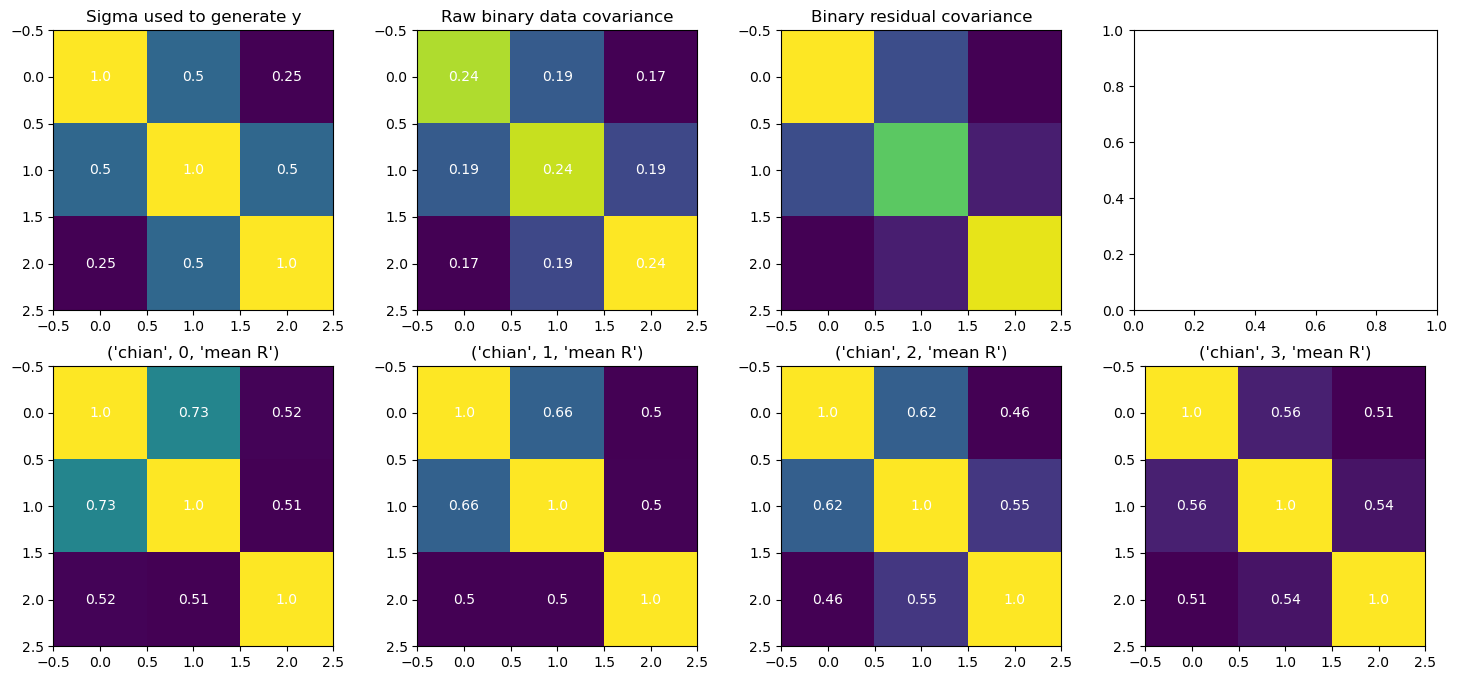

In [ ]:
fig,ax = plt.subplots(2,4,figsize=(18,8))
ax[0,0].imshow(a_cor)
ax[0,0].set_title(("Sigma used to generate y"))
for i in range(3):
    for j in range(3):
        ax[0,0].text(i,j,str(round(a_cor[j,i],2)),
                     c='w', ha='center', va='center')
ax[0,1].imshow(np.cov(x.T))
ax[0,1].set_title(("Raw binary data covariance"))
for i in range(3):
    for j in range(3):
        ax[0,1].text(i,j,str(round(np.cov(x.T)[j,i],2)),
                     c='w', ha='center', va='center')
ax[0,2].imshow(np.cov((x-stats.norm().cdf(X@beta_)).T))
ax[0,2].set_title(("Binary residual covariance"))
for chain in range(4):
    ax[1,chain].imshow(idata.posterior['R_corr'].mean(axis=1)[chain])
    for i in range(3):
        for j in range(3):
            ax[1,chain].text(i,j,str(round(idata.posterior['R_corr'].mean(axis=1)[chain].values[j,i],2)),
                             c='w', ha='center', va='center')
    ax[1,chain].set_title(("chian",chain,"mean R"))

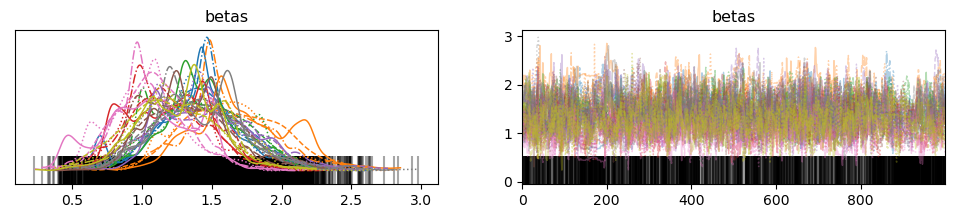

In [ ]:
az.plot_trace(idata,var_names='betas');

Using 20 observations, 4 predictors (including intercept) and 3 binary outcomes.


Output()

ERROR:pymc.stats.convergence:There were 30 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details



Posterior Summary Statistics:
              mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
betas[0, 0] -0.262  0.495    -1.170      0.673      0.049    0.035     101.0   
betas[0, 1] -0.399  0.580    -1.481      0.497      0.075    0.073      86.0   
betas[0, 2]  0.245  0.532    -0.769      1.203      0.044    0.033     148.0   
betas[1, 0] -1.174  0.657    -2.343      0.294      0.085    0.066      62.0   
betas[1, 1]  1.370  0.624     0.324      2.530      0.065    0.048      93.0   
betas[1, 2]  1.357  0.760    -0.124      2.633      0.087    0.071      81.0   
betas[2, 0]  0.951  0.684    -0.319      2.267      0.080    0.062      76.0   
betas[2, 1] -0.604  0.545    -1.740      0.435      0.050    0.036     115.0   
betas[2, 2] -0.732  0.639    -1.967      0.459      0.096    0.068      44.0   
betas[3, 0]  0.796  0.539    -0.108      1.802      0.059    0.042      85.0   
betas[3, 1] -1.278  0.647    -2.496     -0.091      0.068    0.052      90.0   
betas[3, 

Output()


Posterior Predictive Checks:

Overall Prediction Accuracy: 93.33%


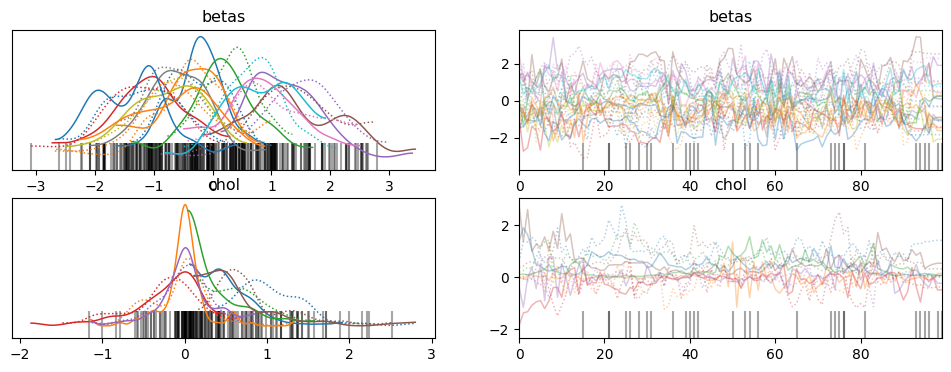

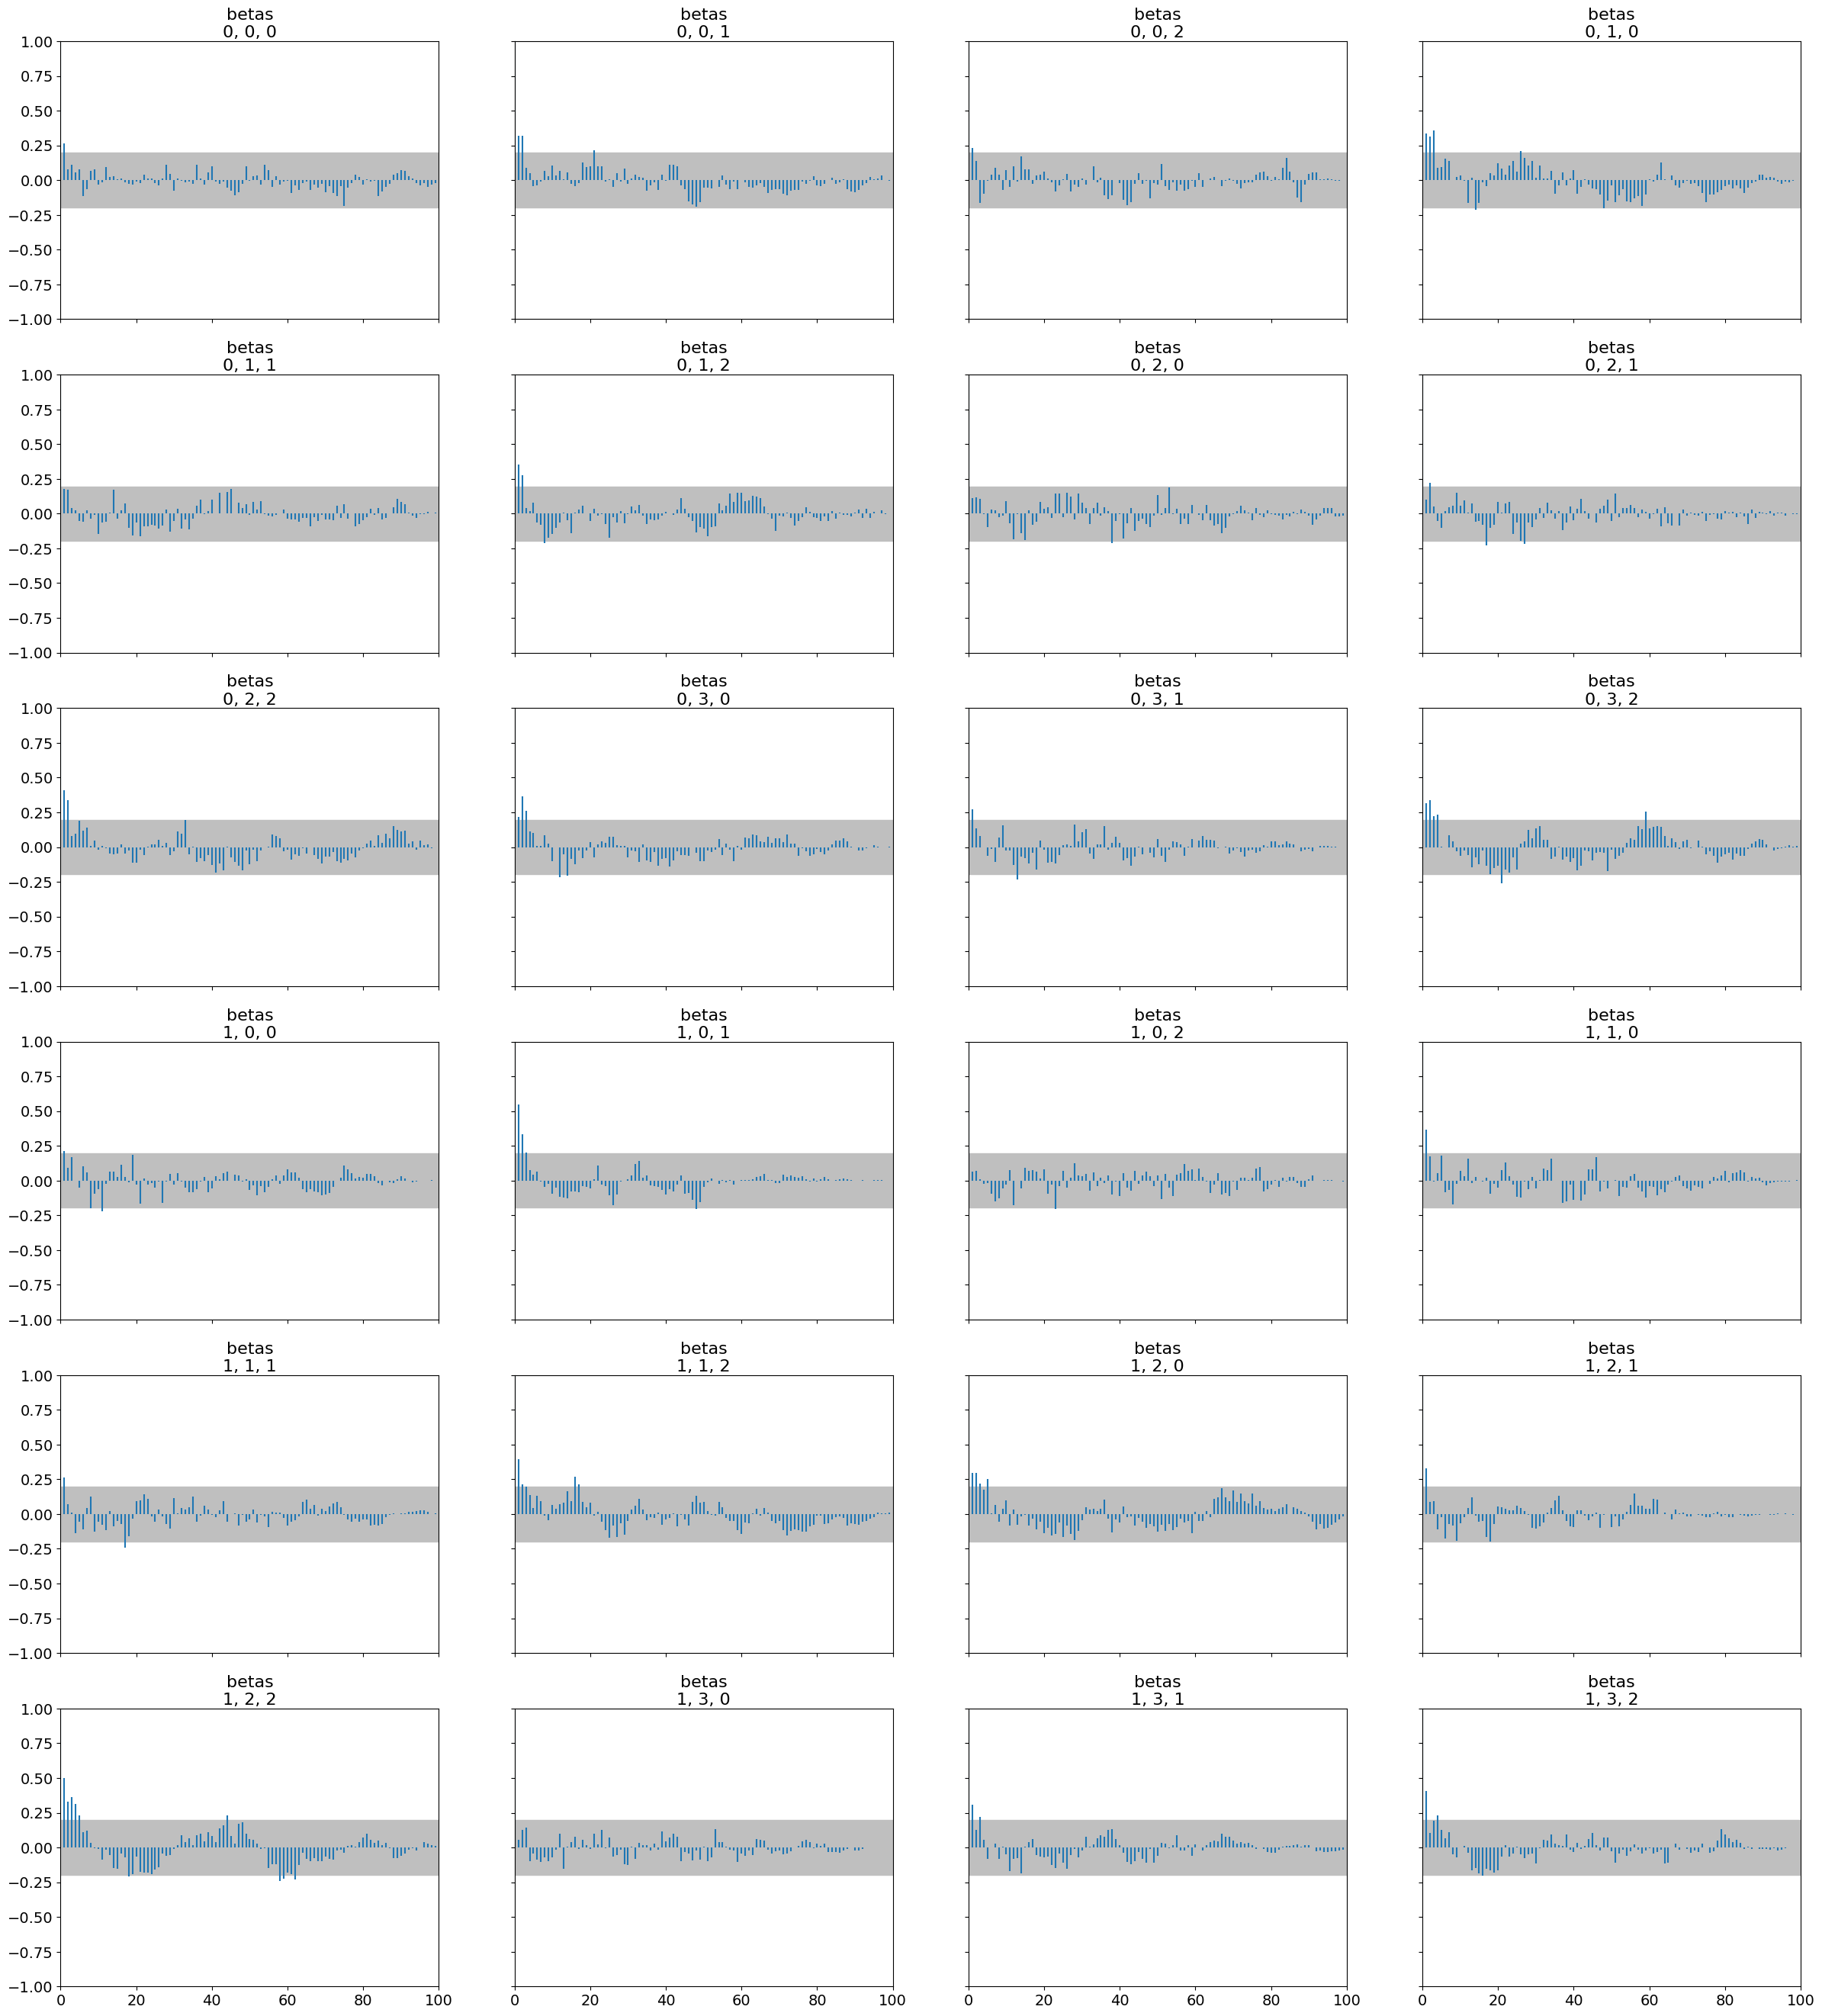

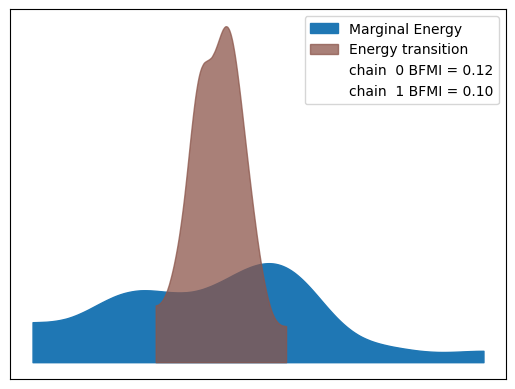

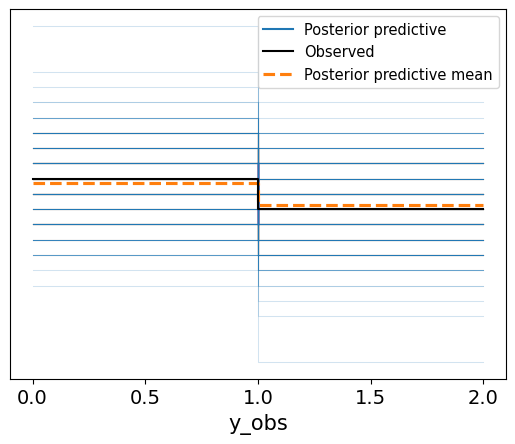

In [28]:
#Q3
import numpy as np
import pandas as pd
import pymc as pm
import arviz as az
import pytensor.tensor as pt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Load dataset from R
mtcars = sm.datasets.get_rdataset('mtcars').data

binary_cols = ['mpg', 'hp', 'wt']
for col in binary_cols:
    median_val = mtcars[col].median()
    mtcars[col + '_bin'] = (mtcars[col] > median_val).astype(int)

feature_cols = ['disp', 'drat', 'qsec']
X_full = mtcars[feature_cols].values

# Define the outcome matrix with the binary versions
y_full = mtcars[[col + '_bin' for col in binary_cols]].values

scaler = StandardScaler()
X_full = scaler.fit_transform(X_full)

np.random.seed(123)
sample_idx = np.random.choice(X_full.shape[0], 20, replace=False)
X = X_full[sample_idx, :]
y = y_full[sample_idx, :]

n, p = X.shape
X = np.c_[np.ones(n), X]
p = X.shape[1]
m = y.shape[1]

print(f"Using {n} observations, {p} predictors (including intercept) and {m} binary outcomes.")

with pm.Model() as model:
    betas = pm.Normal("betas", mu=0, sigma=1, shape=(p, m))

    chol, corr, stds = pm.LKJCholeskyCov(
        "chol",
        n=m,         # dimension equal to number of outcomes
        eta=2.0,
        sd_dist=pm.Exponential.dist(1.0)
    )


    mu = pt.dot(X, betas)


    z = pm.MvNormal("z", mu=mu, chol=chol, shape=(n, m))

    p_prob = pm.math.invprobit(z)

    y_obs = pm.Bernoulli("y_obs", p=p_prob, observed=y)

    trace = pm.sample(
        draws=100,
        tune=100,
        chains=2,
        target_accept=0.9,
        init="adapt_diag",
        random_seed=123,
        cores=1
    )

print("\nPosterior Summary Statistics:")
print(az.summary(trace, var_names=["betas", "chol"], hdi_prob=0.95))

# Trace plots for betas and chol to inspect chain mixing and convergence
az.plot_trace(trace, var_names=["betas", "chol"])


az.plot_autocorr(trace, var_names=["betas"])


az.plot_energy(trace)

with model:
    ppc = pm.sample_posterior_predictive(trace, var_names=["y_obs"])

print("\nPosterior Predictive Checks:")
az.plot_ppc(ppc)

beta_post = trace.posterior["betas"].mean(("chain", "draw")).values
z_pred = X @ beta_post
y_pred = (z_pred > 0).astype(int)
accuracy = (y_pred == y).mean()
print(f"\nOverall Prediction Accuracy: {accuracy:.2%}")


# Q3
Report on finding:
Effect of Downsampling (n, p, m):
Small n:
We see that when the number of observations is small relative to the number of predictors and outcomes, the posterior estimates tend to have wider credible intervals. This suggests more uncertainty in parameter estimates.